
# KKT Conditions

The KKT conditions are from Lagrange multipler and are significant for SVM and SMO. The KKT conditions for the QP problem are particularly simple. The QP problem is solved when, for all $i$:

$$\begin{array}{mm}
a_i = 0 & \Leftrightarrow & t_i y_i \geqslant 1\\
0<a_i<C & \Leftrightarrow & t_i y_i = 1\\
a_i = C & \Leftrightarrow & t_i y_i \leqslant 1
\end{array} \tag{1}$$

where

- Points with $a_i = 0$ are correctly classified and lie outside the margin.
- Points with $0<a_i<C$ are at the edge of the margin and support the margin.
- Points with $a_i = C$ can be either correctly classified and lie inside the margin, or misclassified.

And from the criteria above, it can be seen that the KKT conditions have two requiements. 
1. All the multipliers should lie in the range $[0, C]$.
2. These multipliers lie in different ranges (i.e. equal to $0$ or in the range of $(0,C)$ or equal to $C$) should obey different constraints.

---------------

# SMO

Sequential Minimal Optimization (SMO) is a simple algorithm that can quickly solve the SVM QP (quadratic programming) problem without any extra matrix storage and without using numerical QP optimization steps at all. <font color='red'>SMO decomposes the overall QP problem into QP sub-problems</font>, using Osuna's theorem to ensure convergence.


## Smallest SVM QP problem

SMO chooses to solve the smallest possible optimization problem at every step. For the standard SVM QP problem, <font color='red'>the smallest possible optimization problem involves two Lagrange multipliers, because the Lagrange multipliers must obey a linear equality constraint.</font>

$$\sum_{n=1}^N a_nt_n = 0 \tag{2}$$

It is nonsense to choose only one Lagrange multiplier for optimization, because if so, $a_n$ has to be fixed for suiting the linear equality constraint such that we cannot optimize the Lagrange multiplier $a_n$. Hence, at every step, SMO chooses two Lagrange multipliers to jointly optimize.

$$a_1 + sa_2 = -t_1 \sum_{n\neq 1,2}^N a_n t_n=w\qquad \text{where}\quad s=t_1t_2=\pm 1 \tag{3}$$

where the sumation of $a_1+sa_2$ is fixed. And the optimized Lagrange multipliers $a_1^{new}$ and $a_2^{new}$ has to be subject to the same constraint

$$a_1^{new} + sa_2^{new} = a_1 + sa_2 = w \tag{4}$$

in order to keep meeting the linear equality constraint.


## Ranges of $a_1$ and $a_2$

There are two constriants on $a_1$ and $a_2$:

$$\begin{array}{ll}
\text{KKT requirement}&0\leqslant a_n \leqslant C\qquad \text{where}\quad n=1,\cdots,N\\
\text{linear equality constraint} &a_1 + sa_2 = w
\end{array} \tag{5}$$

The KKT condition requires the point $(a_2, a_1)$ to lie in the square with length $C$. And the linear equality constraint requires the point $(a_2, a_1)$ lie on the line that is denoted by $a_1 + sa_2 = w$.

### Range of $a_2$

$$\left.\begin{array}{ll}
\text{KKT requirement on }a_1 &0\leqslant a_1 \leqslant C\\
\text{linear equality constraint} &a_2 = sw - sa_1
\end{array}\right\}
\Rightarrow 
a_2 \in
\left\{\begin{array}{ll}
[-w, -w+C] & \text{if} & s=-1\\
[w-C, w] & \text{if} & s=1
\end{array}\right. \tag{6}$$

And $a_2$ must also be in the range $[0, C]$, hence

$$a_2 \in [L, H]\qquad \text{where}\quad
\left\{\begin{array}{ll}
L=max(0, -w) & H=min(C, -w+C) & \text{if} & s=-1\\
L=max(0, w-C) &H=min(C, w) & \text{if} & s=1
\end{array}\right. \tag{7}$$

After adjustment, we obtain

$$\bbox[#e0f0ff]{\begin{array}{ll}
\text{if} & s=-1: &L=max(0, a_2-a_1) & H=min(C, C+a_2-a_1) \\
\text{if} & s=1: &L=max(0, a_2+a_1-C) &H=min(C, a_2+a_1) 
\end{array}} \tag{8}$$

### Range of $a_1$

We shall use the linear equation $a_1 + sa_2 = w$ to evaluate the value of $a_1$. As long as $a_2\in [L, H]$, the $a_1$ that derives from $a_2$ will also lie in the range of $[0, C]$ and obey the linear equality constraint.


*If $L\geqslant H$, we cannot take the subsequent steps to optimize the pair of $a_1$ and $a_2$.*


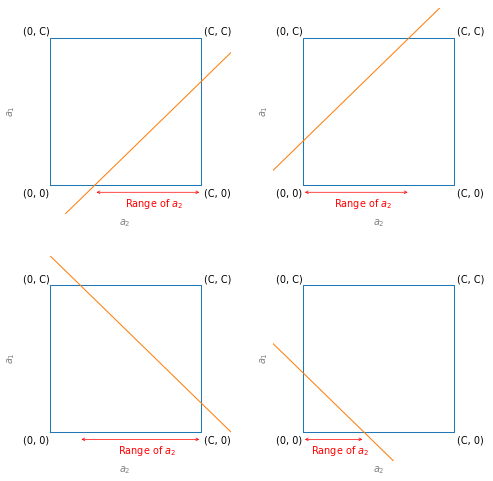

In [3]:
import numpy as np
import matplotlib.pyplot as plt

REC_LINES = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
SLANT_LINE_X = np.array([-2, 2])

def hide_axes(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.set_xlim(-.2, 1.2)
    ax.set_ylim(-.2, 1.2)
    
def draw_rec(ax):
    hide_axes(ax)
    ax.plot(REC_LINES[0], REC_LINES[1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(r'$a_2$', fontsize=14, color='grey')
    ax.set_ylabel(r'$a_1$', fontsize=14, color='grey')
    ax.text(-0.18, -0.08, "(0, 0)", fontsize=14)
    ax.text(-0.18, 1.02, "(0, C)", fontsize=14)
    ax.text(1.02, -0.08, "(C, 0)", fontsize=14)
    ax.text(1.02, 1.02, "(C, C)", fontsize=14)

def draw_line(ax, sign, k):
    x = SLANT_LINE_X
    y = k - sign*x
    ax.plot(x, y)
    
def draw_range(ax, xstart, xend, y):
    ax.annotate(
        '', xy=(xstart, y), xycoords='data',
        xytext=(xend, y), textcoords='data',
        arrowprops={'arrowstyle': '<->', 'color':'r'})
    ax.text(xstart+(xend-xstart-.3)/2, y-.1, r"Range of $a_2$", fontsize=14, color='r')

def main():
    fig=plt.figure(figsize=(12,12), dpi=50)
    (ax1,ax2),(ax3,ax4) = fig.subplots(2, 2)
    draw_rec(ax1)
    draw_rec(ax2)
    draw_rec(ax3)
    draw_rec(ax4)
    
    K = np.array([-.3, .3, 1.2, .4])
    S = np.array([-1, -1, 1, 1])
    draw_line(ax1, S[0], K[0])
    draw_line(ax2, S[1], K[1])
    draw_line(ax3, S[2], K[2])
    draw_line(ax4, S[3], K[3])
    
    i = 0
    for ax in [ax1, ax2, ax3, ax4]:
        x0 = S[i]*K[i] - S[i]*0
        xc = S[i]*K[i] - S[i]*1
        # print(x0, xc)
        l = min(x0, xc)
        h = max(x0, xc)
        L = max(0, l)
        H = min(1, h)
        draw_range(ax, L, H, -.05)
        i+=1
    
    plt.show()
    return

if __name__=="__main__":
    main()



## Determine $a_2$

Firstly, we shall extract the terms that related to $a_1$ and $a_2$ from the objective function.

$$\begin{align*}
\Psi& = \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m t_n t_m k(\mathbf{x}_n, \mathbf{x}_m) - \sum_{n=1}^N a_n\\
&=\underbrace{\frac{1}{2}a_1 a_1 t_1 t_1 k_{11} + \frac{1}{2}a_2 a_2 t_2 t_2 k_{22} + a_1 a_2 t_1 t_2 k_{12} + a_1t_1\sum_{n\neq 1,2}^N a_n t_n k_{1n} + a_2t_2\sum_{n\neq 1,2}^N a_n t_n k_{2n} - a_1 - a_2}_{a_1,a_2 \text{ related entries}\qquad \text{where }k_{ij}=k(\mathbf{x}_i,\mathbf{x}_j)} + constant\\
&=\underbrace{\frac{1}{2}a_1^2 k_{11} + \frac{1}{2}a_2^2 k_{22} + s a_1 a_2 k_{12} + a_1 t_1 v_1 + a_2 t_2 v_2 - a_1 - a_2}_{\text{where }t_{i}^2=1\quad t_i t_j=s=\pm 1\quad v_i=\sum_{n\neq 1,2}^N a_n t_n k_{in}} + constant\\
&=\underbrace{\frac{1}{2}(w-sa_2)^2k_{11} + \frac{1}{2}a_2^2k_{22} + s(w-sa_2)a_2k_{12} + (w-sa_2)t_1 v_1 + a_2 t_2 v_2 - (w-sa_2) - a_2}_{\sum_n^N a_n t_n=0\quad\Rightarrow\quad a_1 + sa_2 = -\sum_{n\neq 1,2}^N a_n t_n=w} + constant\\
\end{align*} \tag{9}$$

which is a quadratic function over $a_2$, and $a_1$ has been transfered to the form denoted by $a_2$ due to the constraint that <font color='red'>the sumation of $a_1$ and $sa_2$ is fixed</font>. As a result, we can make use of the Newton method which is given by a closed form to obtain the optimum of $a_2$.

$$a_2^{new} = a_2 - (\frac{d^2 \Psi}{d a_2^2})^{-1}\frac{d\Psi}{da_2} \tag{10}$$

where the first order derivative of $\Psi$ with respect to $a_2$ is given by

$$\frac{d\Psi}{da_2} = -sk_{11}(w-sa_2) + k_{22}a_2 - k_{12}a_2 + sk_{12}(w-sa_2) - st_1 v_1 + t_2 v_2 + s - 1 \tag{11}$$

the second order derivative of $\Psi$ with respect to $a_2$ is given by

$$\frac{d^2\Psi}{da_2^2} = k_{11} + k_{22} - k_{12} - k_{12} \tag{12}$$

### Positive second order derivative

Note that only if the second order derivative is possitive, which is the usual case, we can get the correct $a_2$, because we have assumed that this is a positive quadratic function and we are looking for the minimum of $a_2$.

With these conditions, we can evaluate the new value of $a_2$ to minimize the objective function $\Psi$.

$$\begin{align*}
a_2^{new} &= a_2 - \frac{ -sk_{11}(w-sa_2) + k_{22}a_2 - k_{12}a_2 + sk_{12}(w-sa_2) - st_1 v_1 + t_2 v_2 + s - 1}{\eta}\qquad\text{let }\bbox[#e0f0ff]{\eta=k_{11} + k_{22} - 2k_{12}}\\
&= a_2 -\frac{-t_1 t_2 k_{11}a_1 + t_2t_2k_{22}a_2 - t_2t_2k_{12}a_2 + t_1t_2k_{12}a_1 - t_1t_2t_1 v_1 + t_2 v_2 + t_1t_2 - t_2t_2}{\eta}\\
&= a_2 -t_2\frac{-t_1 k_{11}a_1 + t_2k_{22}a_2 - t_2k_{12}a_2 + t_1k_{12}a_1 - v_1 +  v_2 + t_1 - t_2}{\eta}\\
&= a_2 -t_2\frac{-\big(t_1 k_{11}a_1 + t_2k_{12}a_2 + v_1 - t_1\big) + \big(t_2k_{22}a_2  + t_1k_{12}a_1 +  v_2 - t_2\big)}{\eta}\\
&= a_2 -t_2\frac{-\big(\sum_{n=1}^N t_na_nk_{1n}-t_1\big) + \big(\sum_{n=1}^N t_na_nk_{2n}-t_2\big)}{\eta}\\
&= a_2 + t_2\frac{\big(\sum_{n=1}^N t_na_nk_{1n} + b - t_1\big) - \big(\sum_{n=1}^N t_na_nk_{2n} + b - t_2\big)}{\eta}\\
&= a_2 + t_2\frac{\big(\sum_{n=1}^N t_na_n\phi(\mathbf{x}_n)\phi(\mathbf{x}_1) + b - t_1\big) - \big(\sum_{n=1}^N t_na_n\phi(\mathbf{x}_n)\phi(\mathbf{x}_2) + b - t_2\big)}{\eta}\\
&= a_2 + t_2\frac{\big(\mathbf{w}^T\phi(\mathbf{x}_1) + b - t_1\big) - \big(\mathbf{w}^T\phi(\mathbf{x}_2) + b - t_2\big)}{\eta}\\
&= a_2 + t_2\frac{\big(y_1 - t_1\big) - \big(y_2 - t_2\big)}{\eta}\\
&= \bbox[#e0f0ff]{a_2 + t_2\frac{E_1-E_2}{\eta}\qquad \text{let } E_1 = y_1-t_1\quad E_2 = y_2-t_2} \tag{13}
\end{align*} $$

The obtained $a_2$ is then clipped by the constraints $L$ and $H$.

$$\bbox[#e0f0ff]{
a_2^{new} = \left\{\begin{array}{ll}
H &if &a_2^{new} \geqslant H\\
a_2^{new} &if & L<a_2^{new}<H\\
L &if &a_2^{new} \leqslant L
\end{array}\right.} \tag{14}$$



### Non-positive second order derivative

In any event, SMO will work even when $\eta$ is not positive, in which case the objective function $\Psi$ should be evaluate at each end of the line segment, namely $a_2=L$ and $a_2=H$.

We have got the expression of the objective function $\Psi$ above

$$\Psi = \frac{1}{2}a_1^2k_{11} + \frac{1}{2}a_2^2k_{22} + sa_1a_2k_{12} + a_1t_1 v_1 + a_2 t_2 v_2 - a_1 - a_2 \underbrace{ + constant}_{\text{useless while comparing}} \tag{15}$$

where 'constant' is irrelavent to the variables $a_1$ and $a_2$. And because we are going to evaluate $\Psi_{L}$ and $\Psi_H$ for comparision, these terms can be omitted.

Now consider that we are going to assign a new value $A_2$ to $a_2$, then the objective function will take the form

$$\begin{align*}
\Psi(A_2) &= \frac{1}{2}(a_1^{new})^2k_{11} + \frac{1}{2}(a_2^{new})^2k_{22} + sa_1^{new}a_2^{new}k_{12} + a_1^{new}t_1 v_1 + a_2^{new} t_2 v_2 - a_1^{new} - a_2^{new}\\
&= \underbrace{\frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + A_1 t_1v_1 + A_2 t_2v_2 - A_1 - A_2}_{\text{where }A_1 = a_1+s(a_2-A_2)\quad \text{Because }A_1+sA_2=a_1+sa_2}\\
&= \frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + A_1 t_1(v_1-t_1) + A_2 t_2(v_2-t_2)\\
&= \underbrace{\frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + t_1\big(\mathbf{w}^T\phi(\mathbf{x}_1)-a_1t_1k_{11}-a_2t_2k_{12} - t_1\big)A_1 + t_2\big(\mathbf{w}^T\phi(\mathbf{x}_2)-a_1t_1k_{12}-a_2t_2k_{22} - t_2\big)A_2}_{\text{where}\quad v_i=\sum_{n\neq 1,2}^N a_nt_nk_{ni}=\sum_{n=1}^N a_nt_nk_{ni}-a_1t_1k_{1i}-a_2t_2k_{2i}=\mathbf{w}^T\phi(\mathbf{x}_i)-a_1t_1k_{1i}-a_2t_2k_{2i}}\\
&= \frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + t_1\big(y_1-t_1-b-a_1t_1k_{11}-a_2t_2k_{12}\big)A_1 + t_2\big(y_2-t_2-b-a_1t_1k_{12}-a_2t_2k_{22}\big)A_2\\
&= \frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + \Big\{t_1\big(y_1-t_1-b\big)-a_1k_{11}-sa_2k_{12}\Big\}A_1 + \Big\{t_2\big(y_2-t_2-b\big)-sa_1k_{12}-a_2k_{22}\Big\}A_2\\
&= \bbox[#e0f0ff]{\frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + \Big\{t_1\big(E_1-b\big)-a_1k_{11}-sa_2k_{12}\Big\}A_1 + \Big\{t_2\big(E_2-b\big)-sa_1k_{12}-a_2k_{22}\Big\}A_2} \tag{16}
\end{align*}$$

Note that we are looking for a value for minimizing the objective function. SMO will therefore move the Lagrange multipliers to the end point that the lowest value of the objective function.

$$\bbox[#e0f0ff]
{\begin{array}{ll}
\text{If}\quad\Psi(L) < \Psi(H)&: & a_2^{new}=L\\
\text{If}\quad\Psi(L) > \Psi(L)&: & a_2^{new}=H\\
\end{array}} \tag{17}$$


## Determine $a_1$

With $a_2^{new}$, we can derive the new value of $a_1$ from the equality constraint

$$\bbox[#e0f0ff]{a_1^{new} = a_1 + s(a_2-a_2^{new})} \tag{18}$$


## Threshold update

From the updating equation of $a_2$, we notice that each update of $a_2$ needs the outputs $y_1$ and $y_2$. The output function is given by

$$y(\mathbf{x}) = \sum_{n=1}^N a_n t_n k(\mathbf{x},\mathbf{x}_n) + b \tag{19}$$

where $a_1$ and $a_2$ have updated, and the remaining term is the threshold $b$.

Recall that the final result of the Lagrange multipliers satisfy the KKT conditions which are given by

$$\begin{array}{mm}
a_i = 0 & \Leftrightarrow & t_i y_i \geqslant 1 & \Leftrightarrow & y_i \geqslant t_i = 1\text{ or } y_i \leqslant t_i = -1\\
0<a_i<C & \Leftrightarrow & t_i y_i = 1 & \Leftrightarrow & y_i = t_i = 1 \text{ or } y_i = t_i = -1\\
a_i = C & \Leftrightarrow & t_i y_i \leqslant 1 & \Leftrightarrow & y_i \leqslant t_i = 1\text{ or } y_i \geqslant t_i = -1\\
\end{array} \tag{20}$$

Hence, while solving a QP sub problem, we also want the new obtained Lagrange multipliers to satisfy the KKT condition such that we are targeting our final goal. We therefore need to modify $b$ in order to change $y_i$ such that the Lagrange multiplier $a_i$ satisfy the KKT conditions.

$$y_i^{new} = y_i + \Delta a_1 t_1 k_{1i} + \Delta a_2 t_2 k_{2i} + \Delta b \tag{21}$$

where 
- $y_i$ is the old result of the sample point $\mathbf{x}_i$.
- $y_i^{new}$ is the new result of the sample point $\mathbf{x}_i$ after we update the value of $a_1$, $a_2$ and $b$.
- $\Delta a_1 = a_1^{new} - a_1$ is the difference between the new value and old value of $a_1$.
- $\Delta a_2 = a_2^{new} - a_2$ is the difference between the new value and old value of $a_2$. Note that according to the equality constraint, we obtain the Equation (18), such that $\Delta a_1 = -s\Delta a_2$. Namely, if $t_1 = t_2$, then $\Delta a_1$ is equal to $-\Delta a_2$, else if $t_1 != t_2$, then $\Delta a_1$ is equal to $\Delta a_2$.
- $\Delta b = b^{new} - b$ is the difference between the new value and old value of the threshold $b$. In a QP sub problem, we confront two Lagrange multipliers $a_1$ and $a_2$, then the new threshold has to satisfy two conditions corresponding to $y_1$ and $y_2$ respectively in order to make $a_1^{new}$ and $a_2^{new}$ satisfy the KKT conditions. 


### Neither of the two multipliers is on the bound
When neither $a_1^{new}$ and $a_2^{new}$ is not on the bound, the new threshold should force $y_1$ and $y_2$ to $t_1$ and $t_2$.

$$\left.\begin{array}{ll}
0<a_1^{new}<C \\
0<a_2^{new}<C
\end{array}\right\}
\Rightarrow 
\left\{\begin{array}{ll}
y_1^{new} = t_1 \\
y_2^{new} = t_2
\end{array}\right.
\Rightarrow 
\left\{\begin{array}{ll}
b^{new} = t_1- y_1 - \Delta a_1 t_1 k_{11} - \Delta a_2 t_2 k_{12} + b \\
b^{new} = t_2- y_2 - \Delta a_1 t_1 k_{12} - \Delta a_2 t_2 k_{22} + b
\end{array}\right. \tag{22}$$

For keeping the notations uncluttered, we define

$$\begin{array}{ll}
b_1^{new} \equiv t_1- y_1 - \Delta a_1 t_1 k_{11} - \Delta a_2 t_2 k_{12} + b \\
b_2^{new} \equiv t_2- y_2 - \Delta a_1 t_1 k_{12} - \Delta a_2 t_2 k_{22} + b
\end{array} \tag{23}$$

Then the conditions of new threshold $b^{new}$ becomes

$$\begin{array}{ll}
b^{new} = b_1^{new}\\
b^{new} = b_2^{new}
\end{array} \tag{24}$$

Threshould $b^{new}$ is available only if $b_1^{new} = b_2^{new}$. And this equality can be proved by

$$\begin{align*}
b_1^{new} - b_2^{new}
&= (t_1 - y_1 - \Delta a_1 t_1 k_{11} - \Delta a_2 t_2 k_{12} + b) - (t_2 - y_2 - \Delta a_1 t_1 k_{12} - \Delta a_2 t_2 k_{22} + b)\\
&= (t_1 - y_1) - (t_2 - y_2) - \Delta a_1 t_1 (k_{11} - k_{12}) - \Delta a_2 t_2 (k_{12} - k_{22})\\
&= -(E_1 - E_2) + \Delta a_2 t_2 (k_{11} - k_{12}) - \Delta a_2 t_2 (k_{12} - k_{22}) \qquad \left\{\begin{array}{ll}
\text{if }t_1 = t_2, & \Delta a_1 = -\Delta a_2\\
\text{if }t_1 != t_2, & \Delta a_1 = \Delta a_2
\end{array}\right.\\
&= -(E_1 - E_2) + \Delta a_2 t_2 (k_{11} + k_{22} - 2k_{12})\\
&= -(E_1 - E_2) + (a_2^{new} - a_2) t_2 \eta \tag{25}\\
& = -(E_1 - E_2) + (E_1 - E_2) \tag{26}\\
& =  0
\end{align*} $$

$b_1^{new}$ is therefore equal to $b_2^{new}$.


### Only one multiplier is on the bound

We only consider the case as follows. The derivations of the other cases are identical. 

$$\left.\begin{array}{ll}
0<a_1^{new}<C\\
a_2^{new}=0 \\
t_2 = 1\\
\end{array}\right\}
\Rightarrow 
\left\{\begin{array}{ll}
y_1^{new} = t_1 \\
y_2^{new} \geqslant t_2
\end{array}\right.
\Rightarrow 
\left\{\begin{array}{ll}
b^{new} = b_1^{new} \\
b^{new} \geqslant b_2^{new}
\end{array}\right. \tag{27}$$

From the inference， we have already obtain the new threshold, $b^{new} = b_1^{new}$, by setting the new threshold equal to that of which the multiplier not on the bound. However, $b^{new}$ is available only if $b_1^{new} \geqslant b_2^{new}$. And this inequal equation can be proved by

$$\begin{align*}
b_1^{new} - b_2^{new}
&= -(E_1 - E_2) + (a_2^{new} - a_2) t_2 \eta\\
& = -(a_2^* - a_2) t_2 \eta + (a_2^{new} - a_2) t_2 \eta\\
\end{align*} \tag{28}$$

where we assumed $a_2^*$ is the point that gives $\frac{d \Psi}{d a_2}=0$. And for the reason that we have defined $a_2^{new} = 0$, namely $a_2^*$ is clipped by zero, we then have $a_2^*\leqslant a_2^{new} = 0$. Additionally, we have $t_2 = 1$ and $\eta >0$, it can therefore be easily concluded that $b_1^{new} \geqslant b_2^{new}$.

This proof can also be easily expanded to the other one-bound-multiplier cases. 

### Both of the two multipliers are on the bound

In the situation that two multipliers are both on the bound, we notice that there are totally 16 overall cases because there are $t_1, t_2, a_1^{new}, a_2^{new}$, four variables, and each variable has two choises. But actually, under the linear equality and box constraint, we only need to consider 8 cases . The reason is as follows.

- If $t_1$ and $t_2$ have the same sign, then the linear equality equation has the form that $a_1 + a_2 = w$. Now suppose that $(a_2^{new},a_1^{new})$ is equal to $(0, 0)$ or $(C, C)$, then $(0, 0)$ or $(C, C)$ is the only point that lie on the line and lie in the constraint box, that is to say $(a_2^{new}, a_1^{new}) = (a_2, a_1)$, which is the case that we don't need to update $b$. Thus $(a_2^{new},a_1^{new})$ can only be $(0,C)$ or $(C, 0)$.
- If $t_1$ and $t_2$ have different signs, then the linear equality equation has the form that $a_1 - a_2 = w$. Now suppose that $(a_2^{new},a_1^{new})$ is equal to $(0, C)$ or $(C, 0)$, then $(0, C)$ or $(C, 0)$ is the only point that lie on the line and lie in the constraint box, that is to say $(a_2^{new}, a_1^{new}) = (a_2, a_1)$, which is the case that we don't need to update $b$. Thus $(a_2^{new},a_1^{new})$ can only be $(0,0)$ or $(C, C)$.


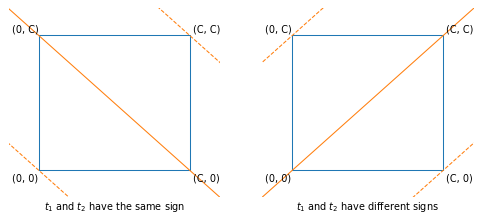

In [2]:
import numpy as np
import matplotlib.pyplot as plt

REC_LINES = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
SLANT_LINE_X = np.array([-2, 2])

def hide_axes(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.set_xlim(-.2, 1.2)
    ax.set_ylim(-.2, 1.2)
    
def draw_rec(ax):
    hide_axes(ax)
    ax.plot(REC_LINES[0], REC_LINES[1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(-0.18, -0.08, "(0, 0)", fontsize=14)
    ax.text(-0.18, 1.02, "(0, C)", fontsize=14)
    ax.text(1.02, -0.08, "(C, 0)", fontsize=14)
    ax.text(1.02, 1.02, "(C, C)", fontsize=14)

def draw_line(ax, sign, k, style=None):
    x = SLANT_LINE_X
    y = k - sign*x
    ax.plot(x, y, linestyle=style, color='C1')

def main():
    fig=plt.figure(figsize=(12,5), dpi=50)
    ax1,ax2 = fig.subplots(1, 2)
    ax1.set_xlabel(r'$t_1$ and $t_2$ have the same sign', fontsize=14)
    ax2.set_xlabel(r'$t_1$ and $t_2$ have different signs', fontsize=14)
    draw_rec(ax1)
    draw_rec(ax2)

    draw_line(ax1, 1, 0, 'dashed')
    draw_line(ax1, 1, 1)
    draw_line(ax1, 1, 2, 'dashed')
    draw_line(ax2, -1, -1, 'dashed')
    draw_line(ax2, -1, 0)
    draw_line(ax2, -1, 1, 'dashed')
    
    
    plt.show()
    return

if __name__=="__main__":
    main()

Here, we only consider the case as follows. The derivations of the other cases are identical. 

$$\left.\begin{array}{ll}
t_1 = 1\\
t_2 = 1\\
a_1^{new}=0 \\
a_2^{new}=C
\end{array}\right\}
\Rightarrow 
\left\{\begin{array}{ll}
y_1^{new} \geqslant t_1 \\
y_2^{new} \leqslant t_2
\end{array}\right.
\Rightarrow 
\left\{\begin{array}{ll}
b^{new} \geqslant b_1^{new} \\
b^{new} \leqslant b_2^{new}
\end{array}\right. \tag{29}$$

which means that we we can assign any value in the range of $[b_1^{new}, b_2^{new}]$ to $b^{new}$ provided that the inequality $b_1^{new} \leqslant b_2^{new}$ holds. And generally, we update the threshold by taking halfway of $b_1^{new}$ and $b_2^{new}$.

We shall prove the inequal equation $b_1^{new} \leqslant b_2^{new}$ below.

#### Prove with $a_2$

$$\begin{align*}
b_1^{new} - b_2^{new}
&= -(E_1 - E_2) + (a_2^{new} - a_2) t_2 \eta\\
& = -(a_2^* - a_2) t_2 \eta + (a_2^{new} - a_2) t_2 \eta \tag{30}\\
\end{align*}$$

where we assumed $a_2^*$ is the point that gives $\frac{d \Psi}{d a_2}=0$. And for the reason that we have defined $a_2^{new} = C$, namely $a_2^*$ is clipped by $C$, we then have $a_2^*\geqslant a_2^{new} = C$. Additionally, we have $t_2 = 1$ and $\eta >0$, it can therefore be easily concluded that $b_1^{new} \leqslant b_2^{new}$.

#### Prove with $a_1$

$$\begin{align*}
b_1^{new} - b_2^{new}
&= -(E_1 - E_2) - (a_1^{new} - a_1) t_1 \eta\\
& = (a_1^* - a_1) t_1 \eta - (a_1^{new} - a_1) t_1 \eta \tag{31}\\
\end{align*}$$

where we assumed $a_1^*$ is the point that gives $\frac{d \Psi}{d a_1}=0$. And for the reason that we have defined $a_1^{new} = 0$, namely $a_1^*$ is clipped by zero, we then have $a_1^*\leqslant a_1^{new} = 0$. Additionally, we have $t_1 = 1$ and $\eta >0$, it can therefore be easily concluded that $b_1^{new} \leqslant b_2^{new}$.



This proof can be easily expanded to the other one-multiplier cases. 

### Conclusion of threshold update

Compute

$$
\bbox[#e0f0ff]{b_i^{new} = - E_i -  (a_1^{new} - a_1) t_1 k(\mathbf{x}_i, \mathbf{x}_1) - (a_2^{new} -a_2) t_2 k(\mathbf{x}_i, \mathbf{x}_2) + b} \tag{32}
$$

We shall obtain two thresholds, $b_1^{new}$ for $a_1^{new}$ and $b_2^{new}$ for $a_2^{new}$. 
- When the new multipliers $a_1^{new}$ and $a_2^{new}$ are both not on the bounds, these two thresholds are equal, and the new thresholds is set to be $b^{new} = b_1^{new} = b_2^{new}$.
- When there is only one multiplier not on the bound, SMO chooses the threshold of which multiplier not on the bound.
- When two multipliers are both on the bound, SMO chooses the threshold to be halfway between $b_1^{new}$ and $b_2^{new}$.


## How to pick $a_1$ and $a_2$

In the previous part we mainly focus on how to evaluate the value of $a_2$, however, the effects on $a_1$ and on $a_2$ are analogous, because this process is looking for the optimum of $a_1$ and $a_2$ that lie in the region of $[0, C]$ and obey the linear equality constraints as well as minimize the objective function. Note that this is a local optimum, because the linear equality constraint depends on $a_1 + sa_2 = w$, where $w$ will change along the SMO progresses and be stable finally.

As a result, we may need multiple loops of optimizations to obtain the final result.

### Pick the first lagrangian multiplier

The outer loop picks the multipliers following the rules below.

1. In the first loop, we shall pick every $a_n$ as the first multiplier because they are just initialized.
2. In the subsequent loops, we shall pick the non-bound $a_n$ as the first multiplier because these examples are most likely to violate the KKT conditions. We keep running this step until all the non-bound $a_n$ obey the KKT conditions.
3. In the last loop, we shall pick every $a_n$ as the first multiplier for KKT condition validation. If the validation fails, step 2 is invoked again.

And before going into the inner loop to pick the second multiplier, we shall check if the picked first multiplier violate the KKT conditions. If not, we should discard the multiplier and continue to the next iteration. <font color='red'>In a word, the first picked multiplier has to be KKT conditions violated, because the Osuna's theorem suggests that only if at least one of the Lagrange multiplier violated the KKT conditions the optimization process can decrease the objective function.</font>

### Pick the second lagrangian multiplier

The goal of the inner loop is to pick one multiplier from the array of multipliers. Now suppose that the index of the first multiplier is given by $i$ and $j$ denote the index of the second multiplier that will be selected. The order of selection should follow the rules below.

1. SMO firstly select the multiplier on the index $j$, where $j$ gives the biggest $|E_1 - E_2|$, namely $|E_i - E_j|$. Because SMO want to maximize the size of step taken during joint optimization. From equation (13), we know that the step size is given by $\frac{|E_1 - E_2|}{\eta}$, however, evaluating the kernel function is time consuming, so SMO approximates the step size by the absolute value of the numerator in the equation.
2. If the above heuristic dose not make positive progress, then SMO starts iterating through the non-bound multipliers.
3. If non of the non-bound examples make positive progress, then SMO starts iterating through the remaining multipliers.


------------

# Overall procedure

1. Initialization.
  - The lagrange multipliers should be non-negatie and satisfy the linear equality constraints.
  - Using the initialized multipliers to compute the errors.
2. The outer loop is to pick the first multiplier that violate the KKT conditions. The rules of iterations is as follows:
  - If this is a initial loop or a validation loop, iterate all the multipliers.
  - Otherwise, iterate the non-bound multipliers.
3. The inner loop is to pick a second multiplier and then optimize these two picked multipliers. The precedence is as follows.
  - The error of the chosen example should gives the biggest difference from the error of the example of the first multiplier.
  - Iterate the non-bound multipliers.
  - Iterate the remaining multipliers.
4. Optimize the two chosen multipliers.
  - Compute the range $[L, H]$ of $a_2$.
  - If $L$ is equal to $H$, then current optimization fails.
  - Compute the second order derivative with respect to $a_2$.
  - If the second order derivative is positive, evaluate the new $a_2^{new}$ with Newton method.
  - If the second order derivative is non-positive, evaluate the new $a_2^{new}$ with $L$ and $H$.
  - If $a_2^{new}$ is equal to $a_2$, then current optimization fails.
  - Compute the new threshold $b^{new}$.
  - Compute the new error for the next optimization.


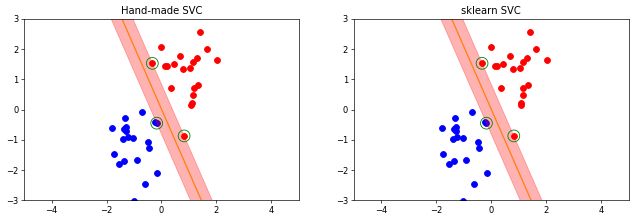

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import logging
import sys
from sklearn.svm import SVC

# convert warnings to error
warnings.filterwarnings("error")

def getLogger(name):
    logger = logging.getLogger(name)
    if len(logger.handlers) == 0:
        handler = logging.StreamHandler(sys.stdout)
        formatter = logging.Formatter('%(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        logger.setLevel(logging.WARNING)
    return logger

logger = getLogger("SMO")

MAX_DEPTH = 20
SPLIT_SECTIONS = 10

S1 = np.array([[0.5, 0.0],
               [0.0, 0.7]])
S2 = np.array([[0.4, 0.0],
               [0.0, 0.7]])
M1 = np.array([1, 1])
M2 = np.array([-1, -1])

kernel = lambda x, y: x@y

def gen_data(n):
    X1 = np.random.multivariate_normal(mean=M1, cov=S1, size=n)
    X2 = np.random.multivariate_normal(mean=M2, cov=S2, size=n)
    X = np.vstack((X1, X2))
    T1 = np.ones(X1.shape[0])
    T2 = np.ones(X2.shape[0])
    T = np.hstack((T1, -T2))
    return X, T

def draw_points(ax, X, T):
    for i in range(len(T)):
        if T[i]==1:
            ax.scatter(X[i][0], X[i][1], s=50, color='red')
        elif T[i]==-1:
            ax.scatter(X[i][0], X[i][1], s=50, color='blue')
    return

class SMO:
    A = None
    X = None
    T = None
    E = None
    b = 0.0
    C = 0.0
    eps = 1e-6
    
    def __init__(self, X, T, C):
        length = len(T)
        self.X = X
        self.T = T
        self.C = C
        # linear equality
        if C>100:
            F = 100
        else:
            F = C
        self.A = np.copy(1.0*T)
        NP = np.sum(self.A[self.A==1])
        NN = length - NP
        NM = max(NP, NN)
        if NM == length:
            logger.error("T:\n {}".format(T))
            raise Exception("Dataset has only one class!")
        factor = (F/2)/NM
        self.A[self.A==1] = factor * NN
        self.A[self.A==-1] = factor * NP
        
        ynb = np.zeros(length)
        for i in range(length):
            ynb[i] = (self.A*self.T)@kernel(X, X[i])
        self.b = np.sum(T - ynb)/length
        self.E = ynb + self.b - T
        logger.info("Initialize \n A = {} \n b = {} \n E = {}".format(self.A, self.b, self.E))
        return

    def Psi(self, A2, k11, k22, k12, t1, t2, E1, E2, a1, a2, b, s):
        A1 = a1+s*(a2-A2)
        ret = .5*A1**2*k11 + .5*A2**2*k22 + s*A1*A2*k12 + (t1*(E1-b)-a1*k11-s*a2*k12)*A1 + (t2*(E2-b)-s*a1*k12-a2*k22)*A2
        return ret
    
    def meet_KKT(self, i):
        # from the equation y = A*T @ kernel(X, x) we can find that X will expand the errors
        eps = self.eps*len(self.T)
        y = self.A*self.T @ kernel(self.X, self.X[i]) + self.b
        logger.info("t = {}, y = {}".format(self.T[i], y))
        if abs(self.A[i])<eps and self.T[i]*y>=1:
            return 1
        if self.A[i]>0 and self.A[i]<self.C and abs(self.T[i]*y-1)<eps:
            return 1
        if abs(self.A[i]-self.C)<eps and self.T[i]*y<=1:
            return 1
        return 0
    
    def optimize(self, i, j):
        if i==j:
            return 0
        a1 = self.A[i]
        a2 = self.A[j]
        x1 = self.X[i]
        x2 = self.X[j]
        t1 = self.T[i]
        t2 = self.T[j]
        E1 = self.E[i]
        E2 = self.E[j]
        C  = self.C
        b  = self.b
        s  = t1*t2
        k11 = kernel(x1, x1)
        k22 = kernel(x2, x2)
        k12 = kernel(x1, x2)
        eps = self.eps
        
        if s==-1:
            L = max(0, a2-a1)
            H = min(C, C+a2-a1)
        elif s==1:
            L = max(0, a2+a1-C)
            H = min(C, a2+a1)
        if L==H:
            logger.info("[{},{}] L==H={}".format(i, j, L))
            return 0
        eta = k11 + k22 - 2*k12
        if eta>0:
            a2new = a2 + t2*(E1-E2)/eta
            logger.info("[{},{}] a2new = {} L = {}, H = {}".format(i, j, a2new, L, H))
            logger.info("eta = {}, E = {}".format(eta, self.E))
            a2new = np.clip(a2new, L, H)
        else:
            SL = self.Psi(L, k11, k22, k12, t1, t2, E1, E2, a1, a2, b, s)
            SH = self.Psi(H, k11, k22, k12, t1, t2, E1, E2, a1, a2, b, s)
            if SL < SH:
                a2new = L
            elif SH < SL:
                a2new = H
            else:
                a2new = a2
            logger.info("[{},{}] L or H or a2\n a2new = {}".format(i, j, a2new))
        if abs(a2 - a2new) < eps:
            logger.info('[{},{}] L={}, H={}, a2new={}'.format(i, j, L, H, a2new))
            logger.info('[{},{}] eta {} error {}'.format(i, j, eta, self.E))
            logger.info("[{},{}] a2==a2new = {}".format(i, j, a2new))
            return 0
        a1new = a1+s*(a2-a2new)
        self.A[i] = a1new
        self.A[j] = a2new
        
        n = 0
        b1new = 0
        b2new = 0
        
        if a1new > 0 and a1new < C:
            b1new = -E1 - (a1new-a1)*t1*k11 - (a2new-a2)*t2*k12 + b
            n = 1
            logger.info("[{},{}] a1 new non bound".format(i, j))
        elif a2new > 0 and a2new < C:
            b2new = -E2 - (a1new-a1)*t1*k12 - (a2new-a2)*t2*k22 + b
            n = 1
            logger.info("[{},{}] a2 new non bound".format(i, j))
        else:
            b1new = -E1 - (a1new-a1)*t1*k11 - (a2new-a2)*t2*k12 + b
            b2new = -E2 - (a1new-a1)*t1*k12 - (a2new-a2)*t2*k22 + b
            n = 2
            logger.info("[{},{}] a1 new a2 new bound, b1new = {}, b2new = {}".format(i, j, b1new, b2new))
        bnew = (b1new + b2new)/n
        self.b = bnew
        
        for k in range(len(self.X)):
            self.E[k] = self.E[k] + (a1new-a1)*t1*kernel(x1, self.X[k]) + (a2new-a2)*t2*kernel(x2, self.X[k]) + (bnew - b)
        return 1

    def pair_optimize(self, i):
        length = len(self.T)
        j = np.argmax(np.abs(self.E[i] - self.E))
        update = self.optimize(i, j)
        if update==1:
            logger.info("[{},{}] A = {}".format(i, j, self.A))
            return update
        for j in range(length):
            if self.A[j]>0 and self.A[j]<self.C:
                update = self.optimize(i, j)
                if update == 1:
                    logger.info("[{},{}] A = {}".format(i, j, self.A))
                    return update
        for j in range(length):
            if self.A[j]<=0 or self.A[j]>=self.C:
                update = self.optimize(i, j)
                if update == 1:
                    logger.info("[{},{}] A = {}".format(i, j, self.A))
                    return update
        return 0

    def train(self):
        length = len(self.T)
        finished = 0
        initialized = 1
        count = 0
        while finished != 1:
            count += 1
            if count == 10000:
                logger.warning("too long!!!!!")
                break
            if initialized==1 or validation==1:
                initialized = 0
                validation = 0
                update = 0
                for i in range(length):
                    update += self.pair_optimize(i)
                if update == 0:
                    finished = 1
            else:
                while True:
                    # find the multiplier that violate KKT condition
                    idx = -1
                    for i in range(length):
                        if self.A[i]>0 and self.A[i]<self.C:
                            is_kkt = self.meet_KKT(i)
                            logger.info("[{}] non bound update meet KKT:{}".format(i, is_kkt))
                            if is_kkt==0:
                                idx = i
                                self.pair_optimize(i)
                    # if all non-bound multipliers meet the KKT conditions
                    if idx == -1:
                        break
                validation = 1
        return

    def draw(self, ax):
        logger.info("lagrange multiplier {}".format(self.A))
        x = np.array([-5, 5])
        y = np.zeros(x.shape)
        w = (self.A*self.T)@self.X
        logger.info("w = {}, b = {}".format(w, self.b))
        y[0] = (-self.b - w[0] * x[0]) / w[1]
        y[1] = (-self.b - w[0] * x[1]) / w[1]
        ax.plot(x, y, color='C1')
        
        y1 = np.zeros(x.shape)
        y2 = np.zeros(x.shape)
        y1[0] = (1-self.b - w[0] * x[0]) / w[1]
        y1[1] = (1-self.b - w[0] * x[1]) / w[1]
        y2[0] = (-1-self.b - w[0] * x[0]) / w[1]
        y2[1] = (-1-self.b - w[0] * x[1]) / w[1]
        if y1[0] < y2[0]:
            ax.fill_between(x, y1, y2, color='r', alpha=.3)
        else:
            ax.fill_between(x, y2, y1, color='r', alpha=.3)
        
        for i in range(len(self.T)):
            if abs(self.A[i]) > 1e-10:
                ax.scatter(self.X[i][0], self.X[i][1], s=200, edgecolors='green', facecolors='none')
        return

def sklearn_SVC(ax, X, T, C):
    svc = SVC(kernel='linear', C = C)
    svc.fit(X, T)
    n = np.sum(svc.n_support_)
    w = svc.coef_.reshape(-1, 1)
    idxs = svc.support_
    a = svc.dual_coef_.reshape(-1,1)
    b = svc.intercept_ 
    y = svc.predict(X[idxs])
    logger.info("a = {} idxs = {} w = {} b={}".format(a, idxs, w, b))
    
    x = np.array([-5, 5])
    y = np.zeros(x.shape)
    logger.info("w = {}, b = {}".format(w, b))
    y[0] = (-b - w[0] * x[0]) / w[1]
    y[1] = (-b - w[0] * x[1]) / w[1]
    ax.plot(x, y, color='C1')
    
    y1 = np.zeros(x.shape)
    y2 = np.zeros(x.shape)
    y1[0] = (1-b - w[0] * x[0]) / w[1]
    y1[1] = (1-b - w[0] * x[1]) / w[1]
    y2[0] = (-1-b - w[0] * x[0]) / w[1]
    y2[1] = (-1-b - w[0] * x[1]) / w[1]
    if y1[0] < y2[0]:
        ax.fill_between(x, y1, y2, color='r', alpha=.3)
    else:
        ax.fill_between(x, y2, y1, color='r', alpha=.3)
    
    ax.scatter(X[idxs, 0], X[idxs, 1], s=200, edgecolors='green', facecolors='none')
    return

def main():
    fig = plt.figure(figsize=(13,4), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    X, T = gen_data(20)
    xmin = -5
    xmax = 5
    ymin = -3
    ymax = 3
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(ymin, ymax)
    ax1.set_title("Hand-made SVC")
    ax2.set_title("sklearn SVC")
    draw_points(ax1, X, T)
    draw_points(ax2, X, T)

    C = 10
    smo = SMO(X, T, C)
    smo.train()
    smo.draw(ax1)
    
    sklearn_SVC(ax2, X, T, C)
    
    plt.show()
    
if __name__=="__main__":
    main()